/var/folders/nj/7_cg2mvd6x31_3cch6mh5nl40000gn/T/ipykernel_17306/1550825355.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = scipy.io.wavfile.read(FILE_PATH)


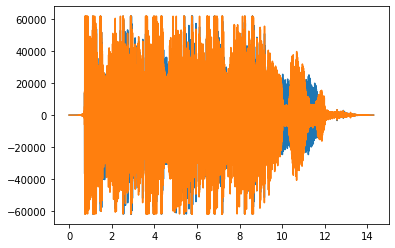

In [3]:
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
 

#音声ファイル読み込み
FILE_PATH = './test_sound.wav'
rate, data = scipy.io.wavfile.read(FILE_PATH)

# 音声データをそのまま表示する
data = data / 32768
time = np.arange(0, data.shape[0]/rate, 1/rate)  

plt.plot(time, data)
plt.show()

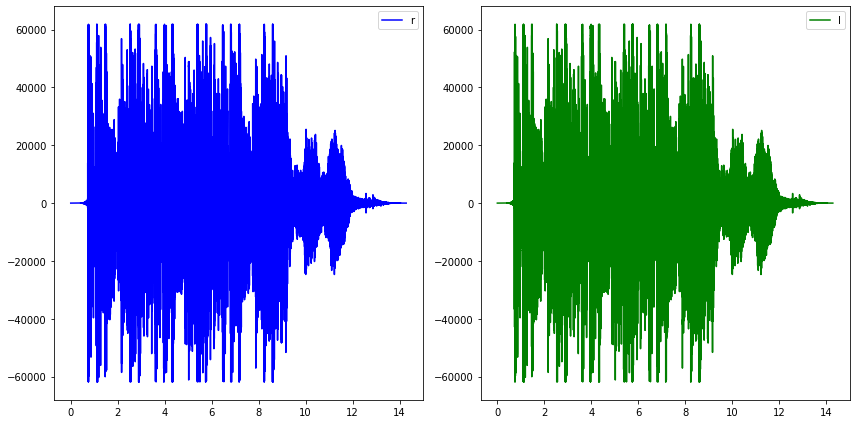

In [4]:
fig = plt.figure(figsize=(12, 6))

#add_subplot()でグラフを描画する領域を追加。引数は行，列，場所
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

c1,c2 = "blue","green"
l1,l2 = "r","l"

ax1.plot(time, [d[0] for d in data], color=c1, label=l1)
ax2.plot(time, [d[0] for d in data], color=c2, label=l2)

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

fig.tight_layout()              #レイアウトの設定
plt.show()

## やりたいこと
いつ音が出されたかを調べ、そのタイミングでノーツを押せるようにする

### 方針
いっかい縮まってるところから、急に大きくなるところが音が出たタイミング？

In [5]:
r = [d[0] for d in data]
l = [d[1] for d in data]

In [25]:
def getTiming(data, k):
    ans = []
    data = [abs(d) for d in data]
    SUM_NUM = 500
    OFFSET = 3000 + 500 * k
    before = sum(data[:SUM_NUM])
    # for i in range(1, len(data)-SUM_NUM):
    #     after = sum(data[i:SUM_NUM+i])
    #     if after - before > OFFSET * SUM_NUM:
    #         ans.append(i)
    #     before = after
    # return ans
    i = 1
    while i < len(data)-SUM_NUM:
        after = sum(data[i:SUM_NUM+i])
        # if after - before > OFFSET * SUM_NUM:
        if after / before > 3:
            ans.append(i)
            # 次の 5000点 ~ 0.1s は使わない
            i += 5000
        i += 200
        before = after
    return ans

print("OFFSET: len(test)")
for k in range(10):
    test = getTiming(r, k)
    print(f'{k:5}: {len(test):6}')

OFFSET: len(test)


/var/folders/nj/7_cg2mvd6x31_3cch6mh5nl40000gn/T/ipykernel_17306/3051553080.py:17: RuntimeWarning: invalid value encountered in double_scalars
  if after / before > 3:
/var/folders/nj/7_cg2mvd6x31_3cch6mh5nl40000gn/T/ipykernel_17306/3051553080.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  if after / before > 3:


    0:      8
    1:      8
    2:      8
    3:      8
    4:      8
    5:      8
    6:      8
    7:      8
    8:      8
    9:      8


In [24]:
BEST_OFFSET = 1
r_hit = getTiming(r, BEST_OFFSET)
l_hit = getTiming(l, BEST_OFFSET)
print(len(r_hit))
print(r_hit)

52
[33001, 38201, 44201, 50201, 55401, 68201, 95801, 101801, 107001, 113601, 119001, 124201, 129401, 136601, 146801, 153601, 158801, 164001, 170201, 175401, 187201, 192401, 198801, 205801, 232001, 237201, 242401, 250201, 256001, 261201, 275401, 283801, 290801, 296001, 301201, 307401, 312601, 324401, 329601, 336001, 342601, 370001, 376201, 381401, 388601, 393801, 400201, 405401, 412401, 421001, 427801, 433001]


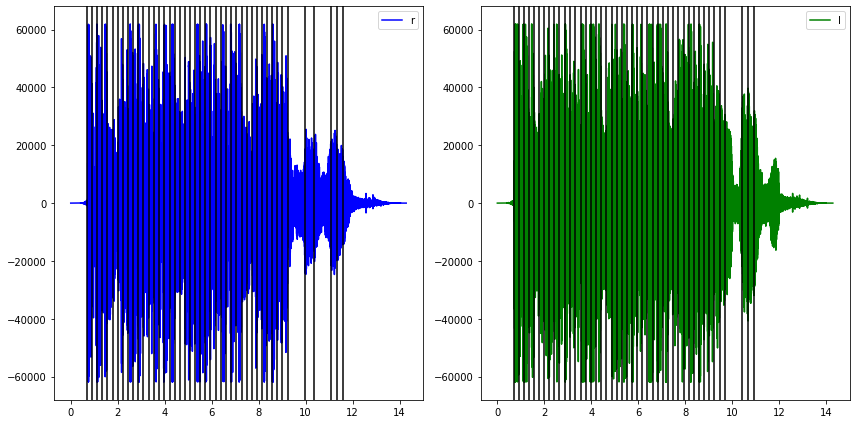

In [19]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

c1,c2 = "blue","green"
l1,l2 = "r","l"

ax1.plot(time, r, color=c1, label=l1)
ax2.plot(time, l, color=c2, label=l2)

# 縦線の追加
for idx in r_hit:
    ax1.axvline(x=time[idx], color="black")
for idx in l_hit:
    ax2.axvline(x=time[idx], color="black")

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

fig.tight_layout()
plt.show()


In [54]:
print(r_hit)

[35878, 35879, 35880, 35881, 35882, 121457, 121458, 121459, 121460, 121461, 121462, 190225, 190226, 258648, 258649, 275970, 275971, 327068, 327069, 327070, 327071, 412587, 412588, 412589, 413183, 413184]


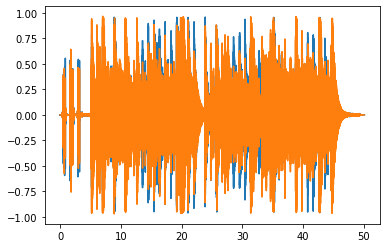

In [26]:
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
 

#音声ファイル読み込み
FILE_PATH = './kimigayo.wav'
rate, data = scipy.io.wavfile.read(FILE_PATH)

# 音声データをそのまま表示する
data = data / 32768
time = np.arange(0, data.shape[0]/rate, 1/rate)  

plt.plot(time, data)
plt.show()


In [35]:
def getPuls(data):
    OFFSET_Y = 0.1
    STEPS = 300
    d_abs = [abs(d) for d in data]
    NUM_AVE = STEPS

    ans = []
    before = False
    for i in range(1, len(d_abs)-STEPS, STEPS):
        after = (sum(d_abs[i:i+STEPS]) > OFFSET_Y*STEPS)
        if before + after == 1:
            ans.append(i)
        before = after

    return ans

data_r = [d[0] for d in data]
turning_points = getPuls(data_r)

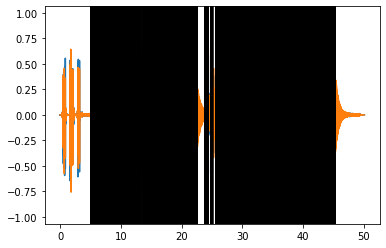

In [36]:
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
 

#音声ファイル読み込み
FILE_PATH = './kimigayo.wav'
rate, data = scipy.io.wavfile.read(FILE_PATH)

# 音声データをそのまま表示する
data = data / 32768
time = np.arange(0, data.shape[0]/rate, 1/rate)  

plt.plot(time, data)

for idx in turning_points:
    plt.axvline(x=time[idx], color="black")

plt.show()

In [37]:
print(turning_points[:10])
print(turning_points[-10:])

[225301, 225601, 225901, 226201, 226501, 226801, 227101, 227401, 227701, 228001]
[1991701, 1992001, 1992301, 1992601, 1992901, 1993201, 1993501, 1993801, 1995001, 1995301]


In [ ]:
print(time[turning_points[0]])
print(time[turning_points[-1]])